# BreakDown library in R

To help understanding which factor is behind specific predictors ...

* https://cran.r-project.org/web/packages/breakDown/index.html
* https://cran.r-project.org/web/packages/breakDown/vignettes/break_glm.html

In [1]:
require(breakDown)
head(HR_data, 3)

Loading required package: breakDown


satisfaction_level last_evaluation number_project average_montly_hours time_spend_company Work_accident left promotion_last_5years sales salary 
 
 0.38 0.53 2 157 3 0 1 0 sales low 
 0.80 0.86 5 262 6 0 1 0 sales medium 
 0.11 0.88 7 272 4 0 1 0 sales medium

Logistig regression model for the "left" data

In [2]:
model <- glm(left~., data = HR_data, family = "binomial")

In [3]:
explain_1 <- broken(model, HR_data[11,])
explain_1

                           contribution
(Intercept)                      -1.601
satisfaction_level = 0.45         0.673
number_project = 2                0.568
salary = low                      0.388
average_montly_hours = 135       -0.295
Work_accident = 0                 0.221
time_spend_company = 3           -0.133
last_evaluation = 0.54           -0.129
promotion_last_5years = 0         0.030
sales = sales                     0.014
final_prognosis                  -0.262
baseline:  0 

Let's visualize it

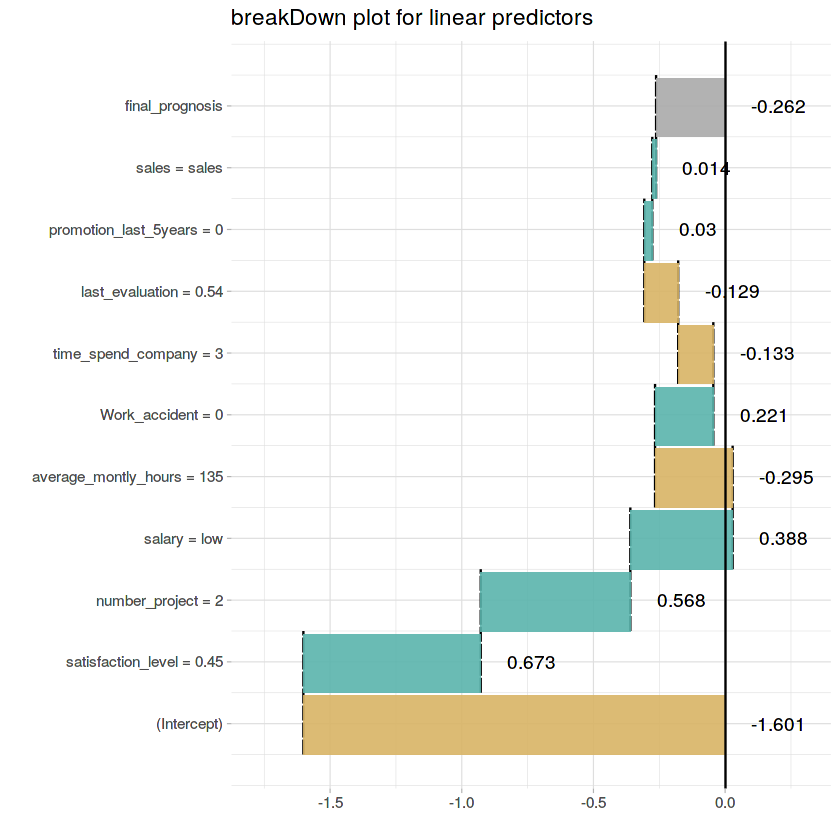

In [4]:
library(ggplot2)
plot(explain_1) + ggtitle("breakDown plot for linear predictors")

... and with intercept at origin

In [5]:
explain_2 <- broken(model, HR_data[11,], baseline = "intercept")
explain_2

                           contribution
satisfaction_level = 0.45         0.673
number_project = 2                0.568
salary = low                      0.388
average_montly_hours = 135       -0.295
Work_accident = 0                 0.221
time_spend_company = 3           -0.133
last_evaluation = 0.54           -0.129
promotion_last_5years = 0         0.030
sales = sales                     0.014
final_prognosis                   1.339
baseline:  -1.601457 

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


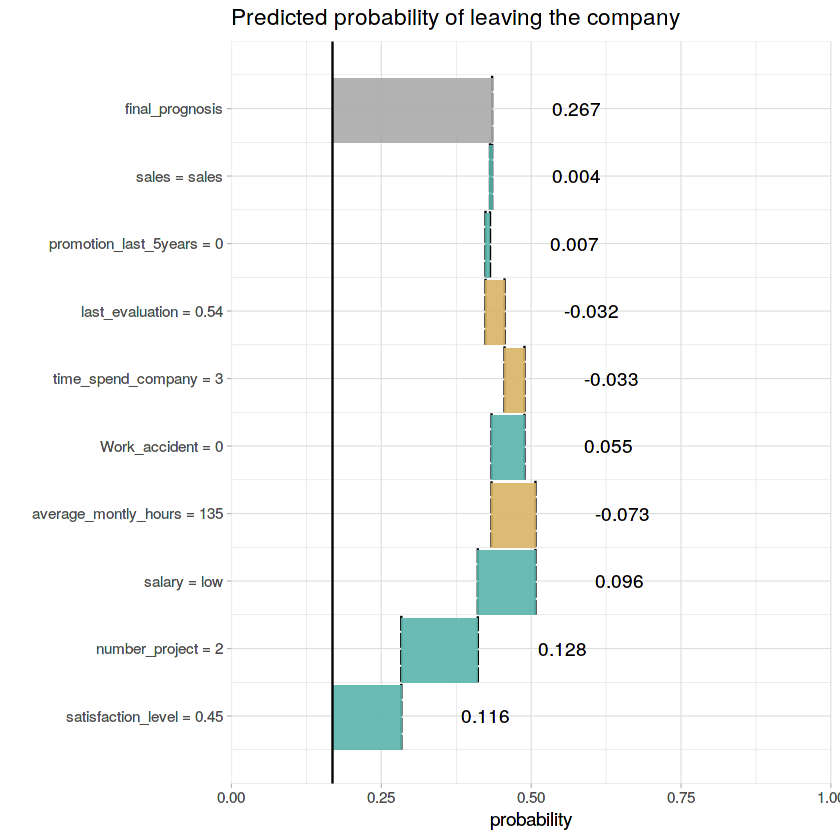

In [6]:
plot(explain_2, trans = function(x) exp(x)/(1+exp(x))) + ggtitle("Predicted probability of leaving the company") + scale_y_continuous(limits = c(0,1), name = "probability", expand = c(0,0))